In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
UtorontoData = pd.read_csv("DataSetUtoronto.csv")

In [3]:
UtorontoData.head(5)

,O-Ring failure,Launch temperature,Leak-check pressure
0,0,66,50
1,1,70,50
2,0,69,50
3,0,68,50
4,0,67,50


In [4]:
y = UtorontoData['O-Ring failure']
X = UtorontoData[['Launch temperature']]

In [14]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(solver = 'newton-cg', max_iter  = 100000)
lm.fit(X,y)
print(lm.coef_)
?LogisticRegression()

[[-0.35616664]]


We learn that for every degree increase in tempretaure the odds of O-Ring Failure goes down by 35.61% percent. This is the only measure gives us a significant result.

In [15]:
from sklearn.metrics import confusion_matrix
y_hat = lm.predict(X)
confusion_matrix(y_hat, y)

array([[17,  2],
       [ 0,  4]])

The confusion matrix suggests that we only misclassify 2 instances.

Since our analysis is only on a small sample and we have two input variables, it is quite likely that we over fit. A better measure of accuracy is Cross Validation> (we could assign some observations as test but since we only had few observations we do not do that). For fewer observations cross-validation is a better option.

In [16]:
from sklearn.cross_validation import cross_val_score
cross_val_score(lm,X,y,cv=10).mean()

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:516: Warning: The least populated class in y has only 6 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=10.
  % (min_labels, self.n_folds)), Warning)


0.93333333333333324

our precision is 93.33% - our Cross Validation error is 16.66%. Conisdering low number of failures in our dataset that is not too good. 

#### We now, explore ROC and AUC of the estimates. 

0.862745098039


<IPython.core.display.Javascript object>


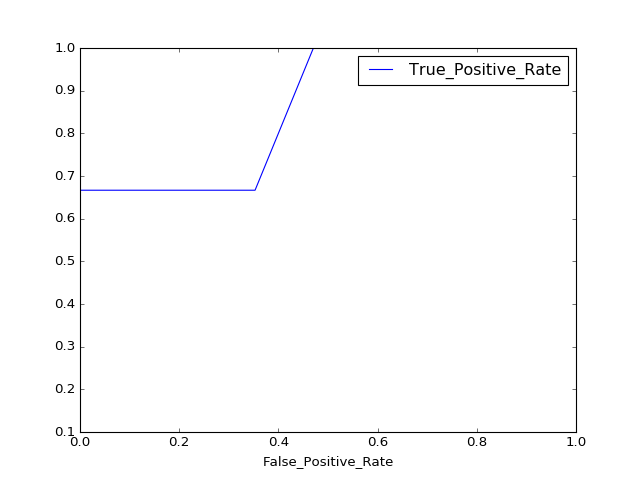

In [17]:
from sklearn.metrics import roc_curve, auc,roc_auc_score
y_hat_probability = lm.predict_proba(X).T[1]  #T[1] returns probability of belonging to class
print(roc_auc_score(y,y_hat_probability))
vals = roc_curve(y,y_hat_probability)
Roc_DataFrame = pd.DataFrame({'False_Positive_Rate':vals[0],'True_Positive_Rate':vals[1]})
Roc_DataFrame.plot(x = 'False_Positive_Rate' , y = 'True_Positive_Rate' ) #beautiful